# Цель лабораторной работы
Изучить способы предварительной обработки данных для дальнейшего формирования моделей<cite data-cite="ue:lab3"></cite>.

# Задание
Требуется<cite data-cite="ue:lab3"></cite>:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.).
2. Для выбранного датасета (датасетов) на основе материалов [лекции](https://github.com/ugapanyuk/ml_course/blob/master/common/notebooks/missing/handling_missing_norm.ipynb) решить следующие задачи:
    * обработку пропусков в данных (не менее 3 признаков);
    * кодирование категориальных признаков (не менее 3 признаков);
    * масштабирование данных (не менее 3 признаков).

# Ход выполнения работы

## Загрузка и первичный анализ данных


Подключим все необходимые библиотеки и настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline 

sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на А4<cite data-cite="doc:pandas"></cite>:

In [2]:
pd.set_option("display.width", 70)

Для&nbsp;выполнения данной лабораторной работы возьмём набор данных Melbourne Housing Market<cite data-cite="kg:melbourne"></cite>:

In [3]:
data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [6]:
data.shape

(63023, 13)

## Обработка пропусков в данных

Найдем все пропуски в данных:

In [7]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

Будем работать с колонкой `Price`.

### Заполнение пропусков нулями

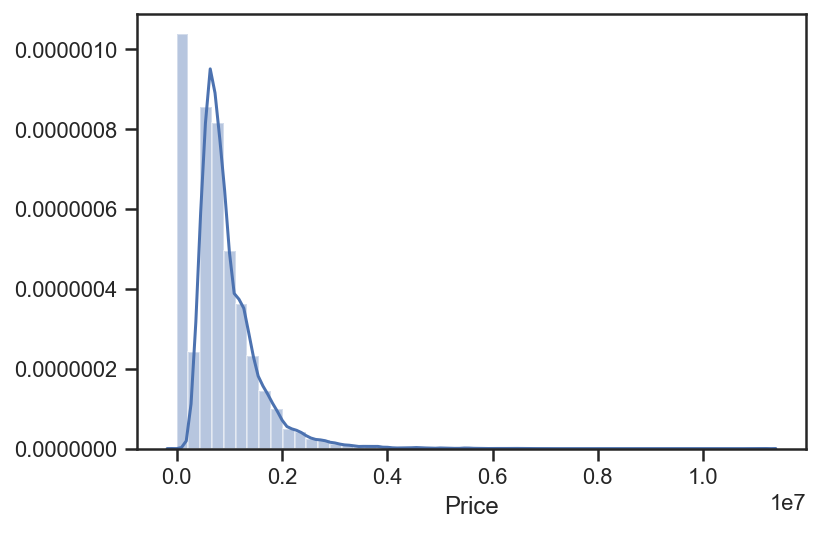

In [8]:
sns.distplot(data["Price"].fillna(0));

### Заполнение пропусков средним значением

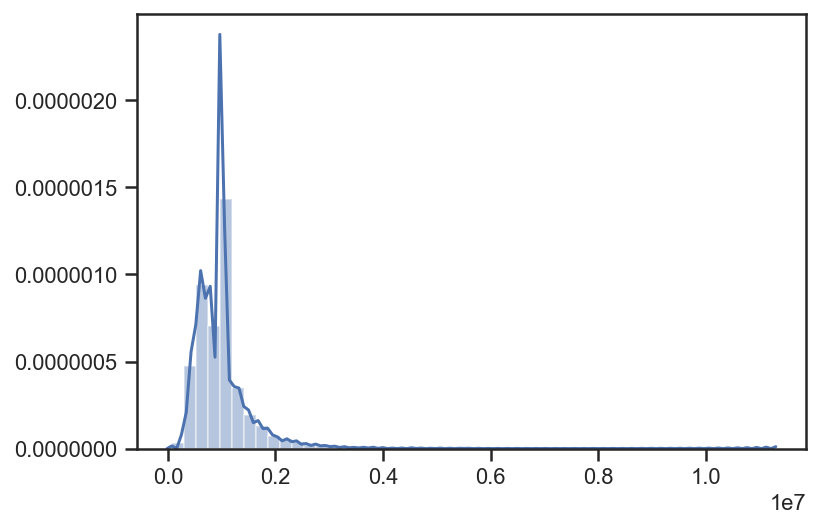

In [9]:
mean_imp = SimpleImputer(strategy="mean")
mean_price = mean_imp.fit_transform(data[["Price"]])
sns.distplot(mean_price);

### Заполнение пропусков медианным значением

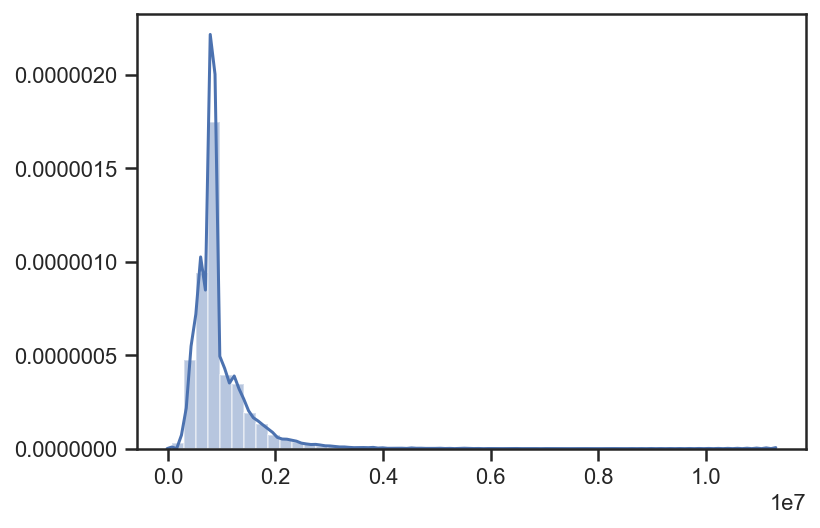

In [10]:
median_imp = SimpleImputer(strategy="median")
median_price = median_imp.fit_transform(data[["Price"]])
sns.distplot(median_price);

И последний вариант — наиболее частое значение:

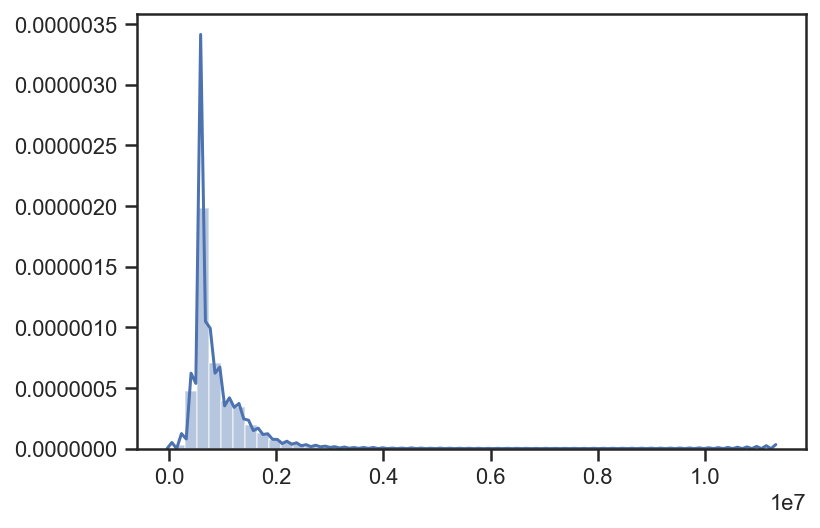

In [11]:
freq_imp = SimpleImputer(strategy="most_frequent")
freq_price = freq_imp.fit_transform(data[["Price"]])
sns.distplot(freq_price);

In [12]:
data[["Price"]] = median_price

## Кодирование категориальных признаков

Рассмотрим колонку `Type`:

In [13]:
types = data[["Type"]]
types["Type"].unique()

array(['h', 't', 'u'], dtype=object)

### Кодирование категорий целочисленными значениями

In [14]:
le = LabelEncoder()
type_le = le.fit_transform(types["Type"])
np.unique(type_le)

array([0, 1, 2])

In [15]:
le.inverse_transform(np.unique(type_le))

array(['h', 't', 'u'], dtype=object)

### Кодирование категорий наборами бинарных значений

In [16]:
ohe = OneHotEncoder()
types_ohe = ohe.fit_transform(types)

In [17]:
types.shape

(63023, 1)

In [18]:
types_ohe.shape

(63023, 3)

In [19]:
types_ohe.todense()[0:10]

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [20]:
types.head(10)

,Type
0,h
1,h
2,h
3,h
4,h
5,t
6,u
7,h
8,h
9,h


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [21]:
type_oh = pd.get_dummies(types)
type_oh.head(10)

,Type_h,Type_t,Type_u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


## Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

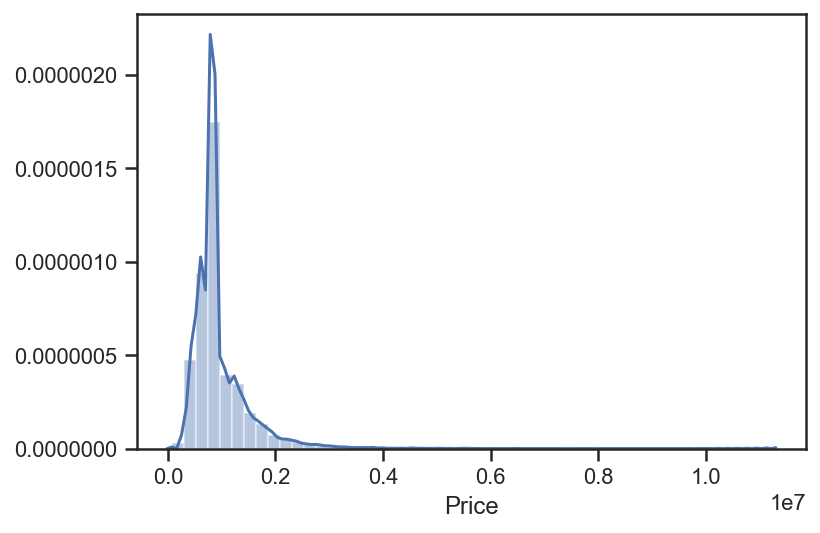

In [22]:
sns.distplot(data['Price'])

### MinMax-масштабирование

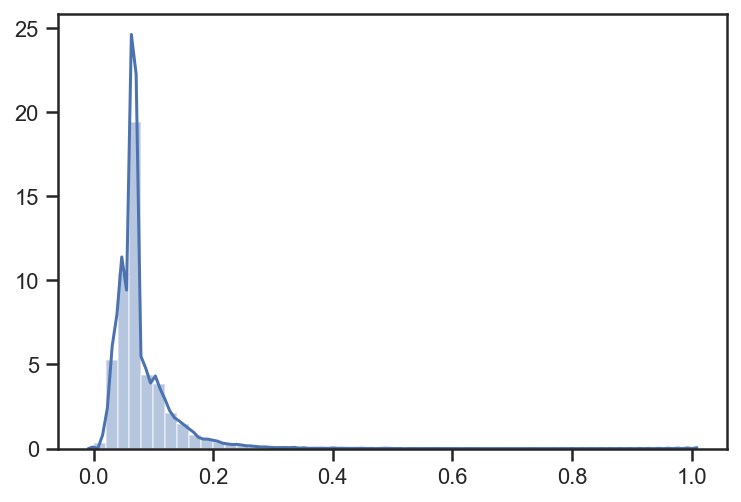

In [23]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])
sns.distplot(sc1_data)

### Масштабирование данных на основе Z-оценки

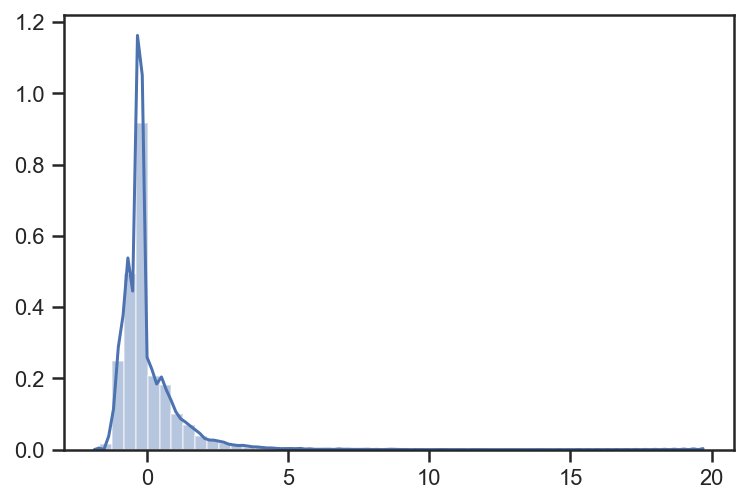

In [24]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price']])
sns.distplot(sc2_data)